# 🚫 WORK IN PROGRESS 🚫 Example of usage with price elasticity

## Load and process

First, the user has to load the framework and generate a process.

In [1]:
%matplotlib widget
from aeromaps import create_process
from aeromaps.core.models import (
    models_traffic,
    models_efficiency_top_down,
    models_energy_without_fuel_effect,
    models_offset,
    models_climate_simple_gwpstar,
    models_sustainability,
    models_energy_cost_simple,
    models_operation_cost_top_down,
    models_cost_feedback
)

In [2]:
models_traffic.pop("rpk")

models_operation_cost_top_down.pop('passenger_aircraft_total_cost_and_airfare')


models = {
    "models_traffic": models_traffic,
    "models_efficiency_top_down": models_efficiency_top_down,
    "models_energy_without_fuel_effect": models_energy_without_fuel_effect,
    "models_offset": models_offset,
    "models_climate_simple_gwpstar": models_climate_simple_gwpstar,
    "models_sustainability": models_sustainability,
    "models_energy_cost_simple": models_energy_cost_simple,
    "models_operation_cost_top_down": models_operation_cost_top_down,
    "models_cost_feedback": models_cost_feedback,
}

In [3]:
process = create_process(
    configuration_file="data_elasticity/config_elasticity.json",
    models=models,
)

## Set up variables

### Aviation scenario

In [4]:
process.parameters.price_elasticity = -0.5

In [5]:
# Air traffic evolution

## Growth rate by category [%]
process.parameters.cagr_passenger_short_range_reference_periods = []
process.parameters.cagr_passenger_short_range_reference_periods_values = [3.0]
process.parameters.cagr_passenger_medium_range_reference_periods = []
process.parameters.cagr_passenger_medium_range_reference_periods_values = [3.0]
process.parameters.cagr_passenger_long_range_reference_periods = []
process.parameters.cagr_passenger_long_range_reference_periods_values = [3.0]
process.parameters.cagr_freight_reference_periods = []
process.parameters.cagr_freight_reference_periods_values = [3.0]

In [6]:
# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process.parameters.load_factor_end_year = 89.0  # 2019 value: 82.399312

In [7]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

In [8]:
# Aircraft energy - Introduction of alternative drop-in fuels
import numpy as np
## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_share_reference_years_values = np.array([0.0, 0.0, 0.0,0.0])
process.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electrofuel_share_reference_years_values = np.array([0.0, 0.0, 0.0, 0.0])

In [9]:
# Various environmental settings

## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
process.parameters.biofuel_hefa_fog_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_fog_share_reference_years_values = [100, 0.7, 0.7, 0.7]
process.parameters.biofuel_hefa_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_others_share_reference_years_values = [0.0, 3.8, 3.8, 3.8]
process.parameters.biofuel_ft_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_others_share_reference_years_values = [0.0, 76.3, 76.3, 76.3]
process.parameters.biofuel_ft_msw_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_msw_share_reference_years_values = [0.0, 7.4, 7.4, 7.4]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electricity_emission_factor_reference_years_values = [429.0, 180.0, 75.0, 30.0]

## Share of hydrogen production pathways (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_electrolysis_share_reference_years_values = [2, 50, 100, 100]
process.parameters.hydrogen_gas_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_ccs_share_reference_years_values = [0, 0, 0, 0]
process.parameters.hydrogen_coal_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_coal_ccs_share_reference_years_values = [0, 0, 0, 0]
process.parameters.hydrogen_gas_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_share_reference_years_values = [71, 50, 0, 0]

In [10]:
# Cost parameters

## Carbon tax
process.parameters.carbon_tax_reference_years = [2020, 2030, 2040, 2050]
process.parameters.carbon_tax_reference_years_values = [
    500,
    500,
    500,
    500
]  # 2020 value differs from the value of Quinet (54 €/tCO2)

### Sustainability assessment

In [11]:
# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process.parameters.net_carbon_budget = 850.0
process.parameters.carbon_dioxyde_removal_2100 = 285.0

## Available energy resources in 2050 [EJ]
process.parameters.waste_biomass = 12.0
process.parameters.crops_biomass = 63.0
process.parameters.forest_residues_biomass = 17.0
process.parameters.agricultural_residues_biomass = 57.0
process.parameters.algae_biomass = 15.0
process.parameters.available_electricity = 200.0

In [12]:
# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process.parameters.aviation_carbon_budget_allocated_share = 2.6
process.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

## Aviation share of the global energy resources (biomass and electricity) [%]
process.parameters.aviation_biomass_allocated_share = 5.0
process.parameters.aviation_electricity_allocated_share = 5.0

In [13]:
process.setup()
process.compute()

Pre-compute time: 0.02094411849975586 seconds
Compute time: 1.9348890781402588 seconds
Post-compute time: 0.826786994934082 seconds


In [14]:
rpk_with_elast = process.vector_outputs_df["rpk_long_range"]
rpk_no_elast = process.vector_outputs_df["rpk_long_range_no_elasticity"]

In [20]:
process.vector_outputs_df["total_cost_per_rpk_without_extra_tax"]

1940         NaN
1941         NaN
1942         NaN
1943         NaN
1944         NaN
1945         NaN
1946         NaN
1947         NaN
1948         NaN
1949         NaN
1950         NaN
1951         NaN
1952         NaN
1953         NaN
1954         NaN
1955         NaN
1956         NaN
1957         NaN
1958         NaN
1959         NaN
1960         NaN
1961         NaN
1962         NaN
1963         NaN
1964         NaN
1965         NaN
1966         NaN
1967         NaN
1968         NaN
1969         NaN
1970         NaN
1971         NaN
1972         NaN
1973         NaN
1974         NaN
1975         NaN
1976         NaN
1977         NaN
1978         NaN
1979         NaN
1980         NaN
1981         NaN
1982         NaN
1983         NaN
1984         NaN
1985         NaN
1986         NaN
1987         NaN
1988         NaN
1989         NaN
1990         NaN
1991         NaN
1992         NaN
1993         NaN
1994         NaN
1995         NaN
1996         NaN
1997         NaN
1998         N

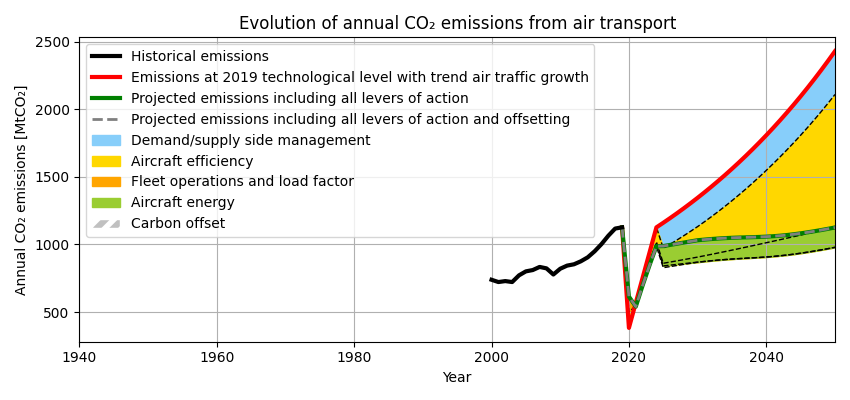

In [16]:
process.plot('air_transport_co2_emissions')

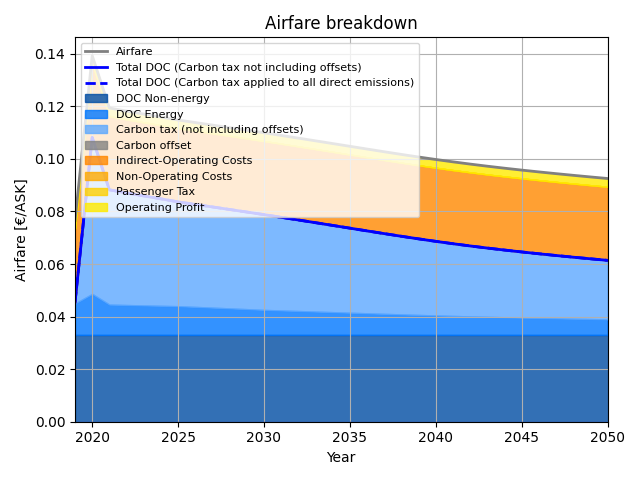

In [18]:
process.plot('airfare_per_rpk')